# PROBLEM SCENARIO
Consider the dataset `ZOO DOT DATA` and look at the information proviede in the first five rows. The first column denotes the animal name and the last one specifies the high-level class for the corresponding animals.
1.   Identify the unique number of high-level classes.
2.   Perform agglomerative clustering using the 16 intermediate features.
3.   Compute the mean squared error by comparing the actual high-level class and the predicted high-level class.

In a nutshell, you just have to perform agglomerative clustering with the appropriate `MSE` value.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vaasu2002/Machine-Learning-Projects/main/Zoo%20Animal%20Classification/zoo.csv")

In [3]:
df.shape

(101, 18)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [6]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Identify the unique number of high-level classes

In [7]:
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [8]:
import numpy as np
labels = df['class_type']
print(np.unique(labels.values))

[1 2 3 4 5 6 7]


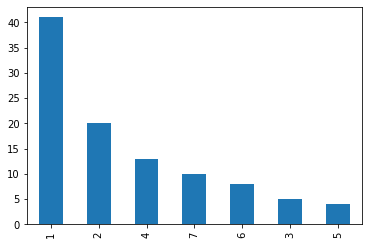

In [9]:
labels.value_counts().plot(kind = 'bar')
#pd.value_counts(df['class_type'])
#pd.value_counts(df['class_type']).plot(kind = "bar")

From the plot it can be seen that we have 7 unique class labels.

Since we are about to group animals based oj their features, its quite predictive that clustering should be performed.

### Perform agglomerative clustering using the 16 intermediate features.

In [10]:
features = df.values[:,1:-1]
features.shape

(101, 16)

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters = 7 , linkage = "average" , affinity = "cosine" )

In [12]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [13]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [14]:
print(np.unique(model.labels_))
print()
model.labels_

[0 1 2 3 4 5 6]



array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [15]:
labels = labels - 1

np.array(labels)

array([0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 1, 3, 6, 6, 6, 1, 0, 3, 0, 1, 1,
       0, 1, 5, 4, 4, 0, 0, 0, 5, 0, 0, 1, 3, 0, 0, 1, 3, 5, 5, 1, 5, 1,
       0, 0, 6, 0, 0, 0, 0, 5, 4, 6, 0, 0, 1, 1, 1, 1, 3, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 6, 3, 0, 0, 2, 6, 1, 1, 2, 6, 3, 1, 0, 6, 3, 1,
       5, 4, 2, 2, 3, 0, 0, 1, 0, 5, 0, 6, 1])

### Compute the mean squared error by comparing the actual high-level class and the predicted high-level class.

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
score = mean_squared_error(labels , model.labels_)

abs_error = np.sqrt(score)

print(f"ROOT MEAN SQUARE ERROR (RMS ERROR)  :-  {abs_error} ")

ROOT MEAN SQUARE ERROR (RMS ERROR)  :-  2.4373333911071624 
